In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# CNN

In [114]:
# Convolutional Neural Network class
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.reshape(-1, 16 * 5 * 5) # previously view
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        return x

In [125]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5, padding=2)
        self.conv2 = nn.Conv2d(12, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 16, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        self.fc4 = nn.Linear(42, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.reshape(-1, 16 * 4 * 4) # Flatten the image
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)

        return x

In [126]:
model = ConvNet()
model.load_state_dict(torch.load("CNN_CIFAR10_Advanced.ckpt"))
model.to("cuda")

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=42, bias=True)
  (fc4): Linear(in_features=42, out_features=10, bias=True)
)

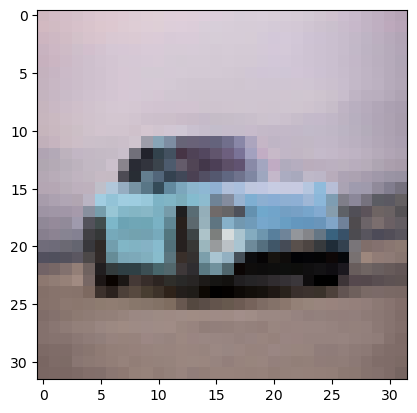

In [127]:
# Load image "car_resized.png"
img = Image.open("car_resized.png")
img = np.array(img)

plt.imshow(img)

In [128]:
img.shape

(32, 32, 3)

In [129]:
# Convert image to tensor
img = torch.from_numpy(img).float()

# Normalize image
img = img / 255.0

# Add batch dimension
img = img.unsqueeze(0)

# Add channel dimension
img = img.permute(0, 3, 1, 2)

In [130]:
img.shape

torch.Size([1, 3, 32, 32])

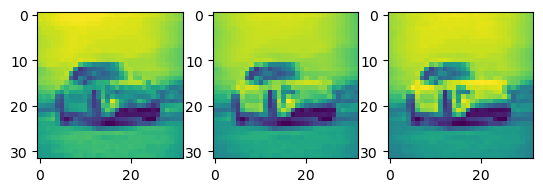

In [131]:
plt.subplot(1, 3, 1)
plt.imshow(img[0][0])
plt.subplot(1, 3, 2)
plt.imshow(img[0][1])
plt.subplot(1, 3, 3)
plt.imshow(img[0][2])

In [132]:
# Classes from CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

predictions = model(img.to("cuda"))
predictions = F.softmax(predictions, dim=1)

predictions_classes = {classes[i]: predictions[0][i].item() for i in range(10)}

predictions_classes

{'plane': 0.01763487048447132,
 'car': 0.0010566143319010735,
 'bird': 0.00011389281280571595,
 'cat': 0.00011840844672406092,
 'deer': 0.00012524124758783728,
 'dog': 2.0384609342727344e-06,
 'frog': 1.5246104339894373e-05,
 'horse': 0.00010038533946499228,
 'ship': 0.9763041138648987,
 'truck': 0.0045291967689991}

In [133]:
_, predicted = torch.max(predictions, 1)

predicted.item()

8

# Resnet18

In [4]:
# Classes from CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [19]:
# Load pre-trained ResNet18 model
model_ft = models.resnet18()

# Change the last fully connected layer to output 10 classes
num_ftrs = model_ft.fc.in_features # Number of input features for the last layer
model_ft.fc = nn.Linear(num_ftrs, len(classes))

# Load saved weights
model_ft.load_state_dict(torch.load("ResNet18_IMAGENET1K_V1_CIFAR10_Finetuned.ckpt"))

model_ft.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

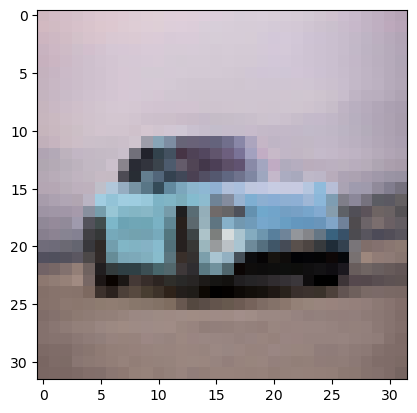

In [20]:
# Load image "car_resized.png"
img = Image.open("car_resized.png")
# img = np.array(img)

plt.imshow(img)

In [27]:
# Use the same transforms and data augmentation as the ResNet18 model during training
transform = models.ResNet18_Weights.IMAGENET1K_V1.transforms()

img = transform(img)

# Add batch dimension
img = img.unsqueeze(0)

In [28]:
img.shape

torch.Size([1, 3, 224, 224])

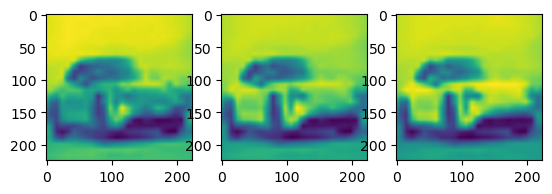

In [29]:
plt.subplot(1, 3, 1)
plt.imshow(img[0][0])
plt.subplot(1, 3, 2)
plt.imshow(img[0][1])
plt.subplot(1, 3, 3)
plt.imshow(img[0][2])

In [30]:
predictions = model_ft(img.to("cuda"))
predictions = F.softmax(predictions, dim=1)

predictions_classes = {classes[i]: predictions[0][i].item() for i in range(10)}

predictions_classes

{'plane': 0.11115971207618713,
 'car': 0.04632716253399849,
 'bird': 0.1887941062450409,
 'cat': 0.24556268751621246,
 'deer': 0.012898322194814682,
 'dog': 0.046518560498952866,
 'frog': 0.047049954533576965,
 'horse': 0.02438446320593357,
 'ship': 0.06765232235193253,
 'truck': 0.20965276658535004}

In [31]:
_, predicted = torch.max(predictions, 1)

predicted.item()

3